In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os

os.environ['SNORKELDB'] = 'postgres://localhost:5432/babble_test_spouse'

from snorkel import SnorkelSession
session = SnorkelSession()

In [2]:
from snorkel.models import candidate_subclass

Spouse = candidate_subclass('Spouse', ['person1', 'person2'])

In [3]:
candidates = session.query(Spouse).all()
print("Candidates: {}".format(len(candidates)))

Candidates: 27766


### Write Input File

In [ ]:
import os
import sys
sys.path.append(os.environ['SNORKELHOME'] + '/tutorials/intro/')

from tutorials.intro import load_external_labels
load_external_labels(session, Spouse, splits=[1])

In [ ]:
from snorkel.annotations import load_gold_labels

# L_gold = load_gold_labels(session, annotator_name='gold', split=0)
L_gold = load_gold_labels(session, annotator_name='gold', split=1)
L_gold

In [ ]:
labels = [L_gold[L_gold.get_row_index(c),0] for c in candidates]
assert(len(labels) == len(candidates))

In [ ]:
from mturk_processing import MTurkHelper
# helper = MTurkHelper(candidates, labels, num_hits=25)
# helper = MTurkHelper(candidates, labels, pct_positive=0.5, num_hits=13)
# helper = MTurkHelper(candidates, labels, pct_positive=0.5, num_hits=12)

In [ ]:
# input_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/spouse/data/mturk_spouse_04_in.csv'
# helper.preprocess(input_csv_path)

### Read Output File

Num HITs unique: 50
Num HITs total: 150


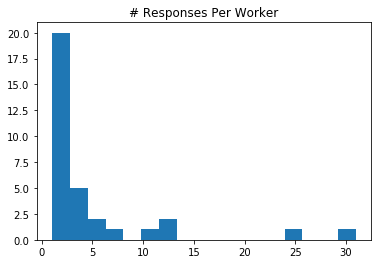

Median # seconds/HIT: 634 (158.0 s/explanation)


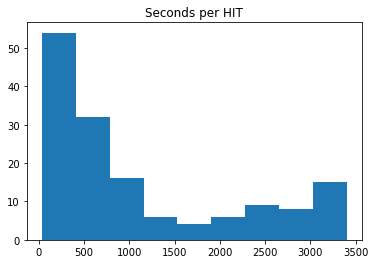

Unanimous: 118
Majority: 37
Bad: 40
Total explanations: 445


In [4]:
from mturk_processing import MTurkHelper
helper = MTurkHelper()
output_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/spouse/data/mturk_spouse_all_out.csv'
explanations = helper.postprocess(output_csv_path, candidates=candidates, verbose=True)

In [5]:
exp_iterator = iter(explanations)

In [6]:
exp = exp_iterator.next()
from snorkel.viewer import SentenceNgramViewer
print(exp.condition)
sv = SentenceNgramViewer([exp.candidate], session, n_per_page=3, height=150)
sv

Politicians


<IPython.core.display.Javascript object>

In [7]:
for exp in explanations[:25]: print(exp.condition)

Politicians
Dusty Hanson and Rand Paul are commenting on politics for a distribution company.
nothing in the text indicates that person1 and person2 are married
No indication of marriage between these two entities.
person1 merely sent a letter to person2.
the given text does not indicate that person1 and person2 are/were married.
person2 is named as person1's wife.
The people highlighted here are married to each other.
the text says "his wife"
nothing in the text indicates that these people are married
No indication of marriage here.
No indication of marriage.
It says they "tied the knot"
text states that person1 and person2 tied the knot
Kim and Kanye tied the knot
Depp's wife actress Amber Heard
"wife:
the text refers to person2 as being the wife of person1
the text indicates that person1 is married to someone who is not person2 and that person2 has a fiance who is not person1
No indication of marriage here.
Lauren Brant and her fiance,' Johns
person1 and person2 are acts performing 

### Write Explanations File

In [10]:
import os
from snorkel.contrib.babble import ExplanationIO

# fpath = os.environ['SNORKELHOME'] + '/tutorials/babble/spouse/data/grad_explanations.tsv'
fpath = os.environ['SNORKELHOME'] + '/tutorials/babble/spouse/data/mturk_explanations_all.tsv'

expio = ExplanationIO()
expio.write(explanations, fpath)

Wrote 445 explanations to /Users/bradenjh/repos/snorkel/tutorials/babble/spouse/data/mturk_explanations_all.tsv


###  Read Explanations File

In [9]:
explanations = expio.read(fpath)
print explanations[:10]

ValueError: need more than 1 value to unpack